# Exploratory Data Analysis (EDA)

Imports

In [2]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

## Analisis del dataset

Primeramente vamos a analizar que tenemos en nuestro proyecto

In [3]:
for f in os.listdir('../data'):
    if not os.path.isdir('../data/' + f):
        print(f.ljust(30) + str(round(os.path.getsize('../data/' + f) / 1000000, 2)) + 'MB')
    else:
        sizes = [os.path.getsize('../data/'+f+'/'+x)/1000000 for x in os.listdir('../data/' + f)]
        print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))

csv_tags                      1.43MB (1 files)
export.pkl                    46.96MB
models                        102.68MB (2 files)
train-jpg                     634.68MB (40479 files)


Tenemos alrededor de 40k imagenes para realizar nuestro modelo. Asi mismo, podemos encontrar en el directorio una carpeta csv_tags con 1 fichero que contiene la informacion de los tags de cada  imagen

Podemos ver que tenemos la informacion de los tags de las imagenes en un csv separado de las imagenes.

## Analisis de los tags del dataset

Vamos a analizar los datos que hay en el csv train_v2 que contienen la informacion de los tags de nuestro conjunto de entrenamiento

In [3]:
df_train = pd.read_csv('../data/csv_tags/train_v2.csv')
df_train_copy = df_train.copy()
df_train.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


Podemos ver que nos estamos encontrando con un problema de clasificacion multiclase. Es por ello que tenemos las etiquetas de las imagenenes en un csv en vez de tener las imagenes almacenadas en carpetas segun su clasificacion.

Procedemos a analizar los tags que tenemos

In [4]:
all_tags = [item for sublist in list(df_train['tags'].apply(lambda row: row.split(" ")).values) for item in sublist] #recogemos los tags
tags_counted_and_sorted = pd.DataFrame({'tag': all_tags}).groupby('tag').size().reset_index().sort_values(0, ascending=False)

In [5]:
tags_counted_and_sorted

,tag,0
12,primary,37513
5,clear,28431
0,agriculture,12315
13,road,8071
16,water,7411
11,partly_cloudy,7261
8,cultivation,4547
9,habitation,3660
10,haze,2697
6,cloudy,2089


Hay una pequeña cantidad de tags que engloban la mayoría de imagenes (primary, clear, agriculture, road, water, partly_cloudy). Por otro lado podemos englobar los tags en 3 categorías:
 - Climatologicas
 - Relacionadas con el terreno
 - Poco usadas

Para ver la relacion entre ellas vamos a realizar unos heatmaps

In [6]:
#lista con tag

all_tags.sort()
tag_list = []

tag_anterior = ""

for tag in all_tags:
    if (tag != tag_anterior):
        tag_list.append(tag)
        tag_anterior = tag

In [7]:
for tag in tag_list:
    df_train[tag] = df_train['tags'].apply(lambda x: 1 if tag in x.split(' ') else 0)

In [8]:
def make_cooccurence_matrix(labels):
    numeric_df = df_train[labels]; 
    c_matrix = numeric_df.T.dot(numeric_df)
    sns.heatmap(c_matrix)
    return c_matrix

### Tags climatologicos

,clear,partly_cloudy,haze,cloudy
clear,28431,0,0,0
partly_cloudy,0,7261,0,0
haze,0,0,2697,0
cloudy,0,0,0,2089


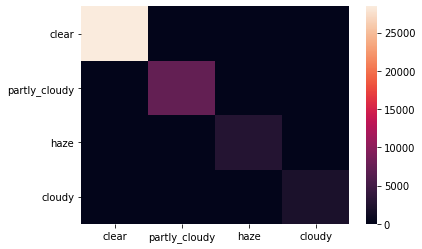

In [9]:
weather_labels = ['clear', 'partly_cloudy', 'haze', 'cloudy']
make_cooccurence_matrix(weather_labels)

Todas las imagenes estan clasificadas con un tag climatologico, la mayoria de ellas con "clear"

### Tags relacionados con el terreno

,primary,agriculture,water,cultivation,habitation
primary,37513,11972,7001,4455,3469
agriculture,11972,12315,2712,3377,2737
water,7001,2712,7411,868,915
cultivation,4455,3377,868,4477,895
habitation,3469,2737,915,895,3660


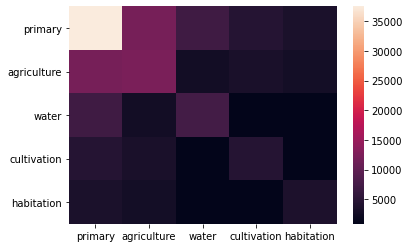

In [10]:
land_labels = ['primary', 'agriculture', 'water', 'cultivation', 'habitation']
make_cooccurence_matrix(land_labels)

En este caso sin enbargo podemos ver que en las imagenes puede haber dos tipos de terreno. La mayoria de imagenes estan relacionadas con la etiqueta "primary"

## Imagenes del dataset

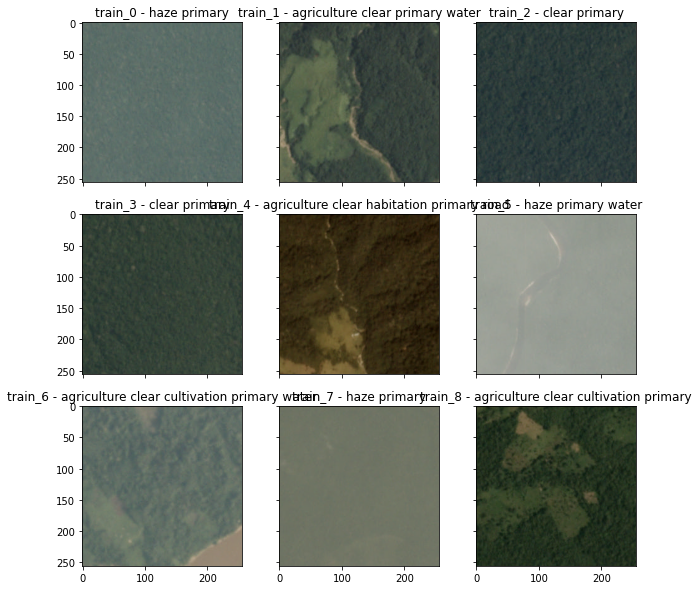

In [11]:
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(10, 10))
i = 0
for f, l in df_train_copy[:9].values:
    img = cv2.imread('../data/train-jpg/{}.jpg'.format(f))
    ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i // 3, i % 3].set_title('{} - {}'.format(f, l))
    #ax[i // 4, i % 4].show()
    i += 1
    
plt.show()